# Preprocessing the database and visualize the classes

In this Notebook we form the informations of the dataset and see which classes exist and each class how many items contain. The result is a valid CSV file with the nessessary informations.

In [1]:
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
%matplotlib inline

In [2]:
# chdir. it depends on the platform
if sys.platform == 'linux':
    # if os is linux cd to
    project_path = "/home/mate/develop/PycharmProjects/GeFace/"
elif sys.platform is 'windows':
    pass
else:
    pass

os.chdir(project_path)

In [3]:
try:
    print(os.getcwd())
    # Open CSV with all informations
    csv_file = pd.read_csv("data/imdb.csv",delimiter = ';', encoding = "ISO-8859-1", engine='python')
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

/home/mate/develop/PycharmProjects/GeFace


In [4]:
csv_file.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,1899,1968,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,[1072.926 161.838 1214.784 303.696],1.459693,1.118973,6488
1,1899,1970,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,[477.184 100.352 622.592 245.76],2.543198,1.852008,6488
2,1899,1968,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,[114.969643089629 114.969643089629 451.6865723...,3.455579,2.985660,6488
3,1899,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,[622.885505642659 424.217503837008 844.3390076...,1.872117,NaN,6488
4,1899,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,[1013.85900236037 233.882042207585 1201.586127...,1.158766,NaN,6488


In [5]:
# Drop all unnessessary infos

df = csv_file.drop(columns=['name', 'face_location','face_score','second_face_score','celeb_id'])

In [6]:
# Calculate age

df['dob'] = df['photo_taken'] - df['dob']


In [7]:
# Create age column
df = df.drop(columns=['photo_taken'])
df = df.rename(index=str, columns={"dob": "age"})


In [8]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [9]:
# Erase every invalid value
df = df.query('age >= 0 and age <=100')

In [10]:
try:
    # Write CSV back for laterer use
    df.to_csv("data/dataset.csv",sep = ';')
except(FileNotFoundError):
    print("Couldnt write datas do csv file")
    print(os.getcwd())

# Visualization of classes

In [11]:
# Import packages for counting and plotting the histogram
from collections import Counter

In [12]:
ages = df['age']
age_counts = Counter(ages)

In [13]:
# Sort ages in increasing order from 0 to 100
df_plot = pd.Series(age_counts).sort_index()
df_plot

0         47
1         65
2        221
3         71
4         58
5        145
6        226
7        283
8        567
9        809
10       932
11      1448
12      1642
13      2178
14      2253
15      2268
16      2835
17      3395
18      3667
19      5045
20      7107
21      8071
22      8202
23     10051
24     10031
25     12916
26     11325
27     14330
28     12622
29     15309
       ...  
71       977
72       963
73       685
74       652
75       558
76       655
77       558
78       450
79       439
80       321
81       313
82       257
83       159
84       211
85       133
86        97
87       118
88        97
89        34
90        56
91        42
92        13
93        14
94        24
95         4
96        15
97        11
98         1
99         3
100        4
Length: 101, dtype: int64

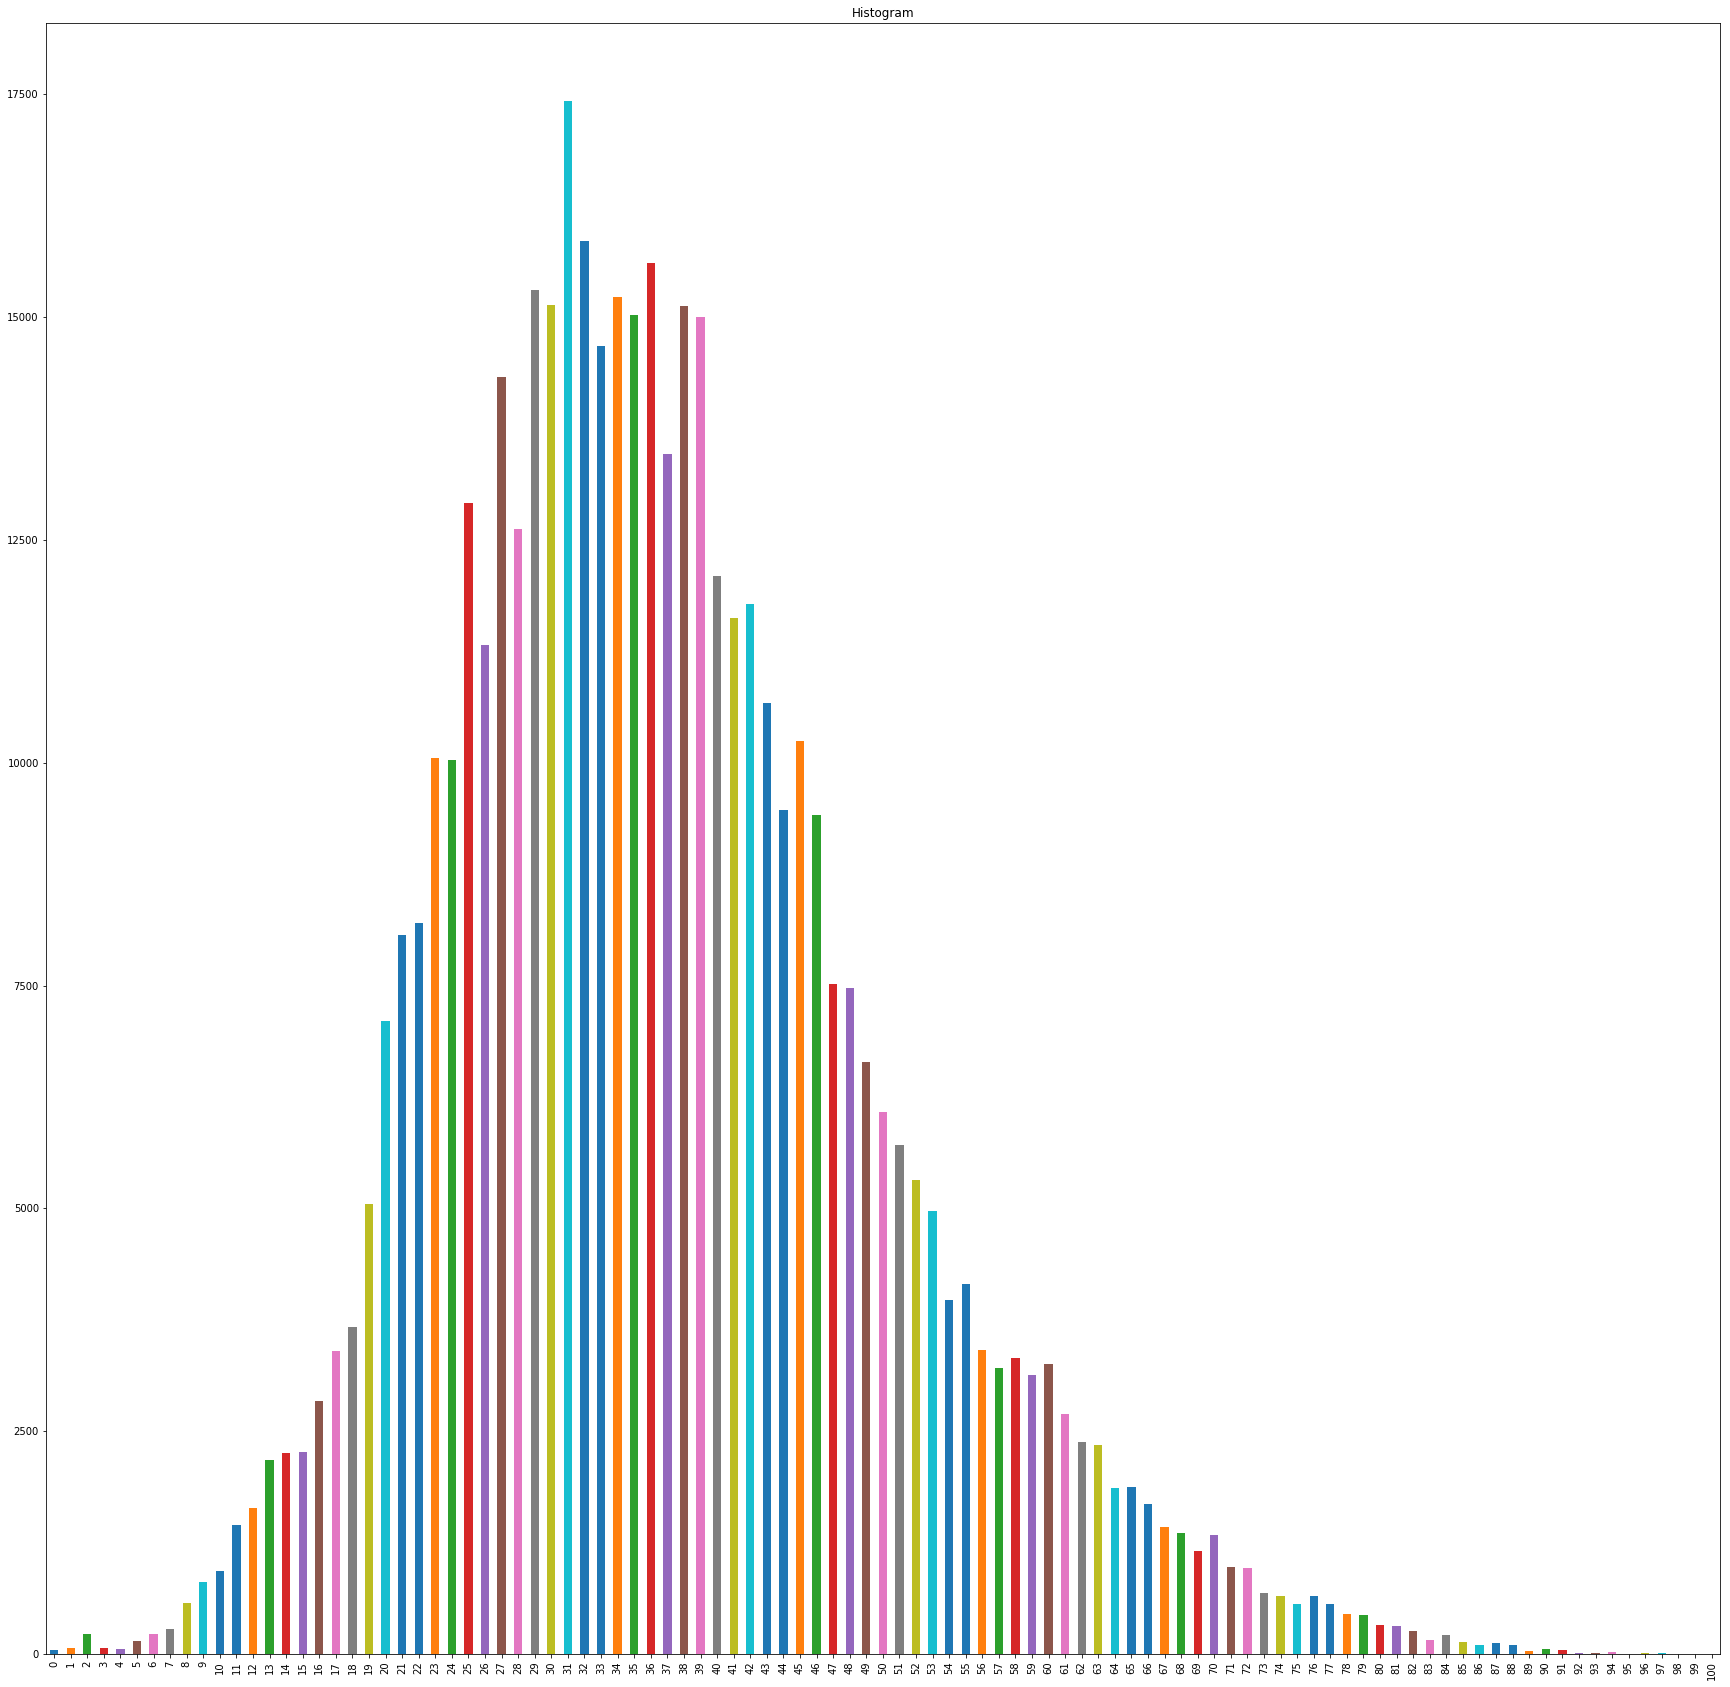

In [14]:
# Plot classes
df_plot.plot(kind = 'bar',figsize=(30,30), title='Histogram')

## Resize images to 128x128
* Get all the paths of the images from the csv file.
* create the same structure of directory
* open images with opencv
* resize them
* save in the new directory

In [20]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [21]:
image_paths = df.drop(columns=["age", "gender"])
image_paths = image_paths.values
df.shape

(460070, 3)

# ÖRKI NE FUTTASD

In [ ]:
# create directory structure
try:
    os.mkdir("faces")
    for i in range(100):
        if i < 10:
            os.mkdir("faces/0" + str(i))
        else:
            os.mkdir("faces/" + str(i))
except(FileExistsError):
    pass

# detect faces
# load detector
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('detector/haarcascade_eye.xml')

min_area = 64 * 64

# open, resize, save
i = 0
skipp_cntr = 0
for path in image_paths:
    path = path[0]
       
    img = cv2.imread("imdb_crop/" + path)
    if img is None:
        continue
    area = img.shape[0] * img.shape[1]
   # print("{}  {}".format(area, path))
    
    # if picture is too small then skipp
    if area >= min_area:
    #res = cv2.resize(img,(128, 128), interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
   
        if faces == () :
            skipp_cntr += 1
            df = df[df.full_path != path]
        else:
            bb = []
            k = 0
            for (x,y,w,h) in faces:
                bb.append([w * h, k])
                k += 1    
#                 print("\t\t{}  {}  {}".format(i, area, path))
#                 roi_color = img[y:y+h, x:x+w]
#                 cv2.imwrite("faces/" + path, roi_color)
                
            bb.sort(reverse=True)
            idx = bb[0][1]
            (x,y,w,h) = faces[idx]
            roi_color = img[y:y+h, x:x+w]
            cv2.imwrite("faces/" + path, roi_color)
            
            if i % 100:
                print(i)
            i += 1
#             if i == 100:
#                 break
    else:
        skipp_cntr += 1
    
print("skipped",skipp_cntr)
df.to_csv("meta/faces.csv")

# ÖRKI INNEN MEHET

In [22]:
df2 = pd.read_csv("meta/faces.csv",delimiter = ',', engine='python')
print(df2.shape)
df2 = df2.drop(columns=["Unnamed: 0"], axis=1)
df2.head()
print(df2.shape)
df = df2

(261523, 4)
(261523, 3)


In [23]:
df.head()
# df.to_csv("meta/faces.csv")

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
4,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [24]:
# lets see the new dataset
ages = df['age']
age_counts = Counter(ages)
# Sort ages in increasing order from 0 to 100
df_plot = pd.Series(age_counts).sort_index()
# Plot classes
df_plot.plot(kind = 'bar',figsize=(30,30), title='Histogram after cutting out faces')

ImportError: matplotlib is required for plotting.

# Shuffle dataset and create train, valid, test datas

In [26]:
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Randomize but always the same random numbers

np.random.seed(42)
random.seed(42)

## Before shuffle

In [27]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
4,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [28]:
# shuffle the rows
df = shuffle(df)

## After shuffle

In [29]:
df.head()

,age,full_path,gender
234703,20,84/nm1086384_rm1097308928_1985-7-27_2005.jpg,1.0
14597,45,90/nm0000190_rm198101504_1969-11-4_2014.jpg,1.0
17991,47,11/nm0000211_rm4256215040_1956-1-27_2003.jpg,0.0
44277,65,58/nm0000658_rm1928118528_1949-6-22_2014.jpg,0.0
172838,31,32/nm0048932_rm3576208128_1969-7-30_2000.jpg,1.0


In [30]:
# calculate test train valid data numbers
test_num = int(np.floor(0.1 * df.shape[0]))
valid_num = int(np.floor(0.2 * df.shape[0]))
train_num = int(df.shape[0] - test_num - valid_num)
print("train: {} | valid: {} | test: {}".format(train_num, valid_num, test_num))

train: 183067 | valid: 52304 | test: 26152


In [31]:
# split the data into train valid and test data
train_data = df.iloc[0:train_num,:]
train_data.shape

(183067, 3)

In [32]:
valid_data = df.iloc[train_num:train_num + valid_num, :]
valid_data.shape

(52304, 3)

In [33]:
test_data = df.iloc[ train_num+valid_num:,:]
test_data.shape

(26152, 3)

In [34]:
image_path = "/faces_colored/"
x_train_p = image_path + train_data['full_path'].values
x_valid_p = image_path + valid_data['full_path'].values
x_test_p = image_path + test_data['full_path'].values
x_test_p.shape

(26152,)

In [35]:
# get the ages
y_train = train_data['age'].values
y_valid = valid_data['age'].values
y_test = test_data['age'].values

# Training and model building

In [38]:
import sys
import os
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

Using TensorFlow backend.


In [39]:
# fix seed for reproducible results (only works on CPU, not GPU)
seed = 42
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

In [41]:
# hyper parameters for model
nb_classes = 100  # number of classes
based_model_last_block_layer_number = 126  # value is based on based model selected.
img_width, img_height = 96, 96  # change based on the shape/structure of your images
batch_size = 32  # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
nb_epoch = 50  # number of iteration the algorithm gets trained.
learn_rate = 1e-4  # sgd learning rate
momentum = 0.9  # sgd momentum to avoid local minimum
transformation_ratio = 0.05  # how aggressive will be the data augmentation/transformation

In [ ]:
def train(train_data_dir, validation_data_dir, model_path):
    # Pre-Trained CNN Model using imagenet dataset for pre-trained weights
    base_model = Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

    # Top Model Block
    x = base_model.output
    x = MaxPooling2D()(x)
    predictions = Dense(nb_classes, activation='softmax')(x)

    # add your top layer block to your base model
    model = Model(base_model.input, predictions)
    print(model.summary())

    # # let's visualize layer names and layer indices to see how many layers/blocks to re-train
    # # uncomment when choosing based_model_last_block_layer
    # for i, layer in enumerate(model.layers):
    #     print(i, layer.name)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all layers of the based model that is already pre-trained.
    for layer in base_model.layers:
        layer.trainable = False

    # Read Data and Augment it: Make sure to select augmentations that are appropriate to your images.
    # To save augmentations un-comment save lines and add to your flow parameters.
    train_datagen = ImageDataGenerator(rescale=1. / 255,
                                       rotation_range=transformation_ratio,
                                       shear_range=transformation_ratio,
                                       zoom_range=transformation_ratio,
                                       cval=transformation_ratio,
                                       horizontal_flip=True,
                                       vertical_flip=True)

    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    os.makedirs(os.path.join(os.path.abspath(train_data_dir), 'preview'), exist_ok=True)
    train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')
    # save_to_dir=os.path.join(os.path.abspath(train_data_dir), '../preview')
    # save_prefix='aug',
    # save_format='jpeg')
    # use the above 3 commented lines if you want to save and look at how the data augmentations look like

    validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                                  target_size=(img_width, img_height),
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical')

    model.compile(optimizer='nadam',
                  loss='categorical_crossentropy',  # categorical_crossentropy if multi-class classifier
                  metrics=['accuracy'])

    # save weights of best training epoch: monitor either val_loss or val_acc

    top_weights_path = os.path.join(os.path.abspath(model_path), 'top_model_weights.h5')
    callbacks_list = [
        ModelCheckpoint(top_weights_path, monitor='val_acc', verbose=1, save_best_only=True),
        EarlyStopping(monitor='val_acc', patience=5, verbose=0)
    ]

    # Train Simple CNN
    model.fit_generator(train_generator,
                        samples_per_epoch=train_generator.nb_sample,
                        nb_epoch=nb_epoch / 5,
                        validation_data=validation_generator,
                        nb_val_samples=validation_generator.nb_sample,
                        callbacks=callbacks_list)

    # verbose
    print("\nStarting to Fine Tune Model\n")

    # add the best weights from the train top model
    # at this point we have the pre-train weights of the base model and the trained weight of the new/added top model
    # we re-load model weights to ensure the best epoch is selected and not the last one.
    model.load_weights(top_weights_path)

    # based_model_last_block_layer_number points to the layer in your model you want to train.
    # For example if you want to train the last block of a 19 layer VGG16 model this should be 15
    # If you want to train the last Two blocks of an Inception model it should be 172
    # layers before this number will used the pre-trained weights, layers above and including this number
    # will be re-trained based on the new data.
    for layer in model.layers[:based_model_last_block_layer_number]:
        layer.trainable = False
    for layer in model.layers[based_model_last_block_layer_number:]:
        layer.trainable = True

    # compile the model with a SGD/momentum optimizer
    # and a very slow learning rate.
    model.compile(optimizer='nadam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # save weights of best training epoch: monitor either val_loss or val_acc
    final_weights_path = os.path.join(os.path.abspath(model_path), 'model_weights.h5')
    callbacks_list = [
        ModelCheckpoint(final_weights_path, monitor='val_acc', verbose=1, save_best_only=True),
        EarlyStopping(monitor='val_loss', patience=5, verbose=0)
    ]

    # fine-tune the model
    model.fit_generator(train_generator,
                        samples_per_epoch=train_generator.nb_sample,
                        nb_epoch=nb_epoch,
                        validation_data=validation_generator,
                        nb_val_samples=validation_generator.nb_sample,
                        callbacks=callbacks_list)

    # save model
    model_json = model.to_json()
    with open(os.path.join(os.path.abspath(model_path), 'model.json'), 'w') as json_file:
        json_file.write(model_json)

# MOST NEM KELL EZ ÖRKI

1
2


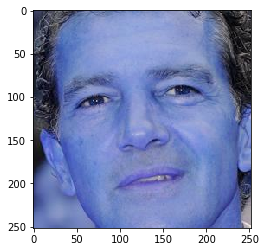

In [85]:
# detect faces
# load detector
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('detector/haarcascade_eye.xml')

min_area = 64*64

# open, resize, save
img = cv2.imread("imdb_crop/04/nm0000104_rm2092810240_1960-8-10_2014.jpg")
area = img.shape[0] * img.shape[1]

# if picture is too small then skipp
if area > min_area:

    #res = cv2.resize(img,(128, 128), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    # if face is too small then skipp
    #     if (w * h) <  (0.25 * area):
    #         skipp_cntr += 1
    #         continue
#     x -= 10
#     y -= 10
#     w += 20
#     h += 20
    bb = []
    i = 0
    for (x,y,w,h) in faces:
        bb.append([w * h, i])
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     #   roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        i += 1
        print(i)
#     cv2.imshow("faces/"+path, roi_color)
#         plt.figure()
#         plt.imshow(roi_color)
    bb.sort(reverse=True)
    idx = bb[0][1]
    (x,y,w,h) = faces[idx]
    roi_color = img[y:y+h, x:x+w]
    plt.imshow(roi_color)

In [80]:
faces

array([[109,  97, 252, 252],
       [382,  55, 117, 117]], dtype=int32)

In [81]:
bb

[[63504, 0], [13689, 1]]

In [82]:
bb.sort(reverse=True)

In [83]:
bb

[[63504, 0], [13689, 1]]